# PPV Analysis (June - August)
#### 9-16-2025

In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [184]:
ppv_df = pd.read_csv('data/PPV_June_August.csv') # only those with discounts > 5 are included
total_df = pd.read_csv('data/June_August.csv') # all invoiced bookings from June-August for HA1

In [185]:
# find unique vendor ID for Shona to use with Tableau
# shona = [x for x in total_df['Vendor account'].unique()] # extract vendor ID used in my dataset for Tableau
# shona_df = pd.DataFrame(shona, columns=['Unique Vendor ID'])
# shona_df.to_csv('data/unique_vendor_accounts.csv', index=False)

In [186]:
print("PPV DataFrame columns")
print(ppv_df.columns.tolist())
print("Shape:", ppv_df.shape)

print("\nTotal bookings DataFrame Columns")
print(total_df.columns.tolist())
print("Shape:", total_df.shape)

PPV DataFrame columns
['vendor_account', 'Purchase order', 'booking_number', 'Net amount', 'Discount', 'Unit price', 'Currency', 'Requested receipt date', 'Procurement category', 'Line status', 'Line number', 'Quantity', 'Group', 'Deliver remainder', 'Item number']
Shape: (5123, 15)

Total bookings DataFrame Columns
['vendor_account', 'Purchase order', 'booking_number', 'Net amount', 'Discount', 'Unit price', 'Currency', 'Requested receipt date', 'Procurement category', 'Line status', 'Line number', 'Quantity', 'Group', 'Deliver remainder', 'Item number']
Shape: (17507, 15)


In [187]:
# calculate PPV percentage by line number
ppv_percentage = len(ppv_df) / len(total_df)

# store it in a new dataframe to display it 
summary1_df = pd.DataFrame({
    'Metric': ['Total PPV Bookings','Total bookings','PPV Percentage'],  # used >= $5 for PPV
    'PO lines': [len(ppv_df), len(total_df), ppv_percentage]
})

print(summary1_df)

print("\nTotal PPV amount:")
print(ppv_df['Discount'].sum())  # this might error out if your csv columns are not number

print("\nTotal Unit Price:")
print(total_df['Unit price'].sum())

print("\nDollar Amount Percentage of PPV:")
print((ppv_df['Discount'].sum()) / (total_df['Unit price'].sum()))

               Metric      PO lines
0  Total PPV Bookings   5123.000000
1      Total bookings  17507.000000
2      PPV Percentage      0.292626

Total PPV amount:
454496.42999999993

Total Unit Price:
45688359.81

Dollar Amount Percentage of PPV:
0.009947751065918598


C:\Users\gavin.qu\AppData\Local\Temp\ipykernel_8056\992360660.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vendor_discounts.index, y=vendor_discounts.values, palette='viridis')


<function matplotlib.pyplot.show(close=None, block=None)>

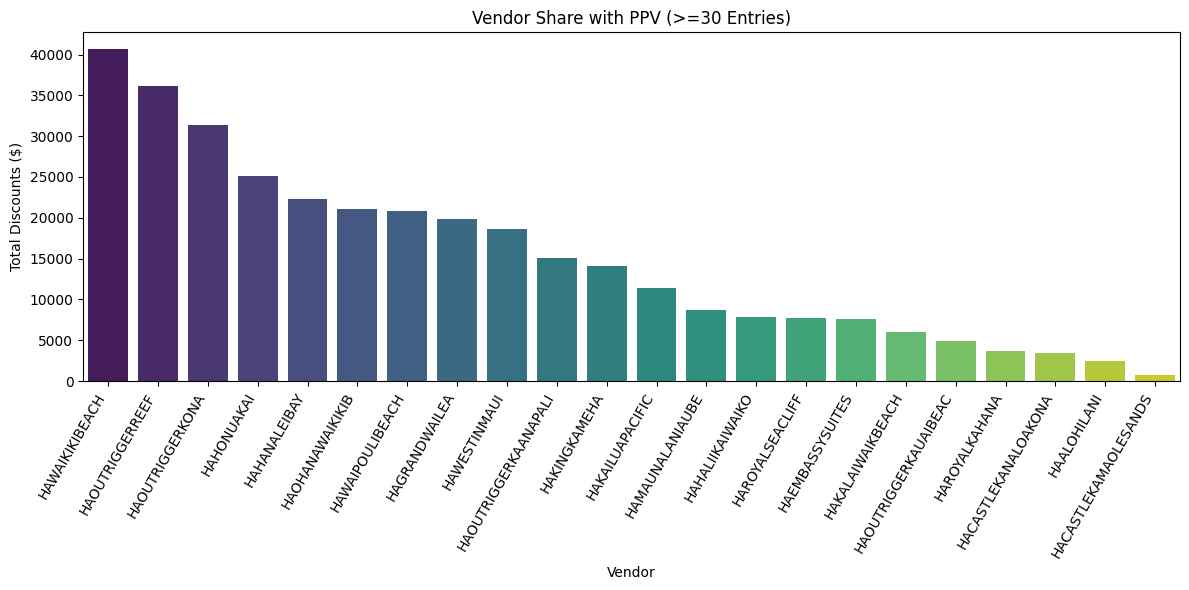

In [188]:
# Exclude those vendors with less than 30 lines of PPV - using top 30 because that is what we identified earlier in Excel
vendor_counts = ppv_df['vendor_account'].value_counts()
valid_vendor = vendor_counts[vendor_counts > 30].index 
filtered_df = ppv_df[ppv_df['vendor_account'].isin(valid_vendor)]

# group by vendors first and sum the discounts
vendor_discounts = filtered_df.groupby('vendor_account')['Discount'].sum().sort_values(ascending=False)

# Plot each vendors share of discounts
plt.figure(figsize=(12,6))
sns.barplot(x=vendor_discounts.index, y=vendor_discounts.values, palette='viridis')
plt.xticks(rotation=60, ha='right')
plt.title('Vendor Share with PPV (>=30 Entries)')
plt.xlabel('Vendor')
plt.ylabel('Total Discounts ($)')
plt.tight_layout()
plt.show

C:\Users\gavin.qu\AppData\Local\Temp\ipykernel_8056\4234526366.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=vendor_discounts.index, x=vendor_discounts.values, palette='viridis')


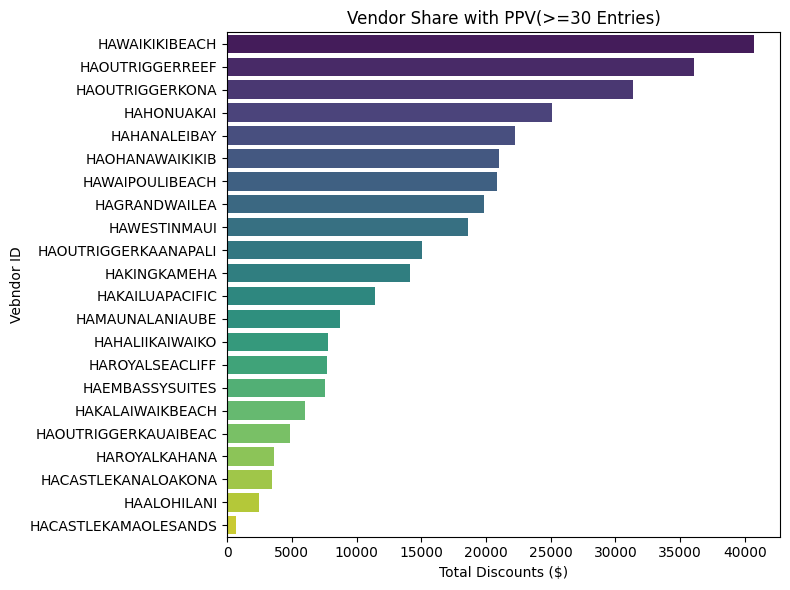

In [189]:
# same plot as above but horizontal
plt.figure(figsize=(8,6))
sns.barplot(y=vendor_discounts.index, x=vendor_discounts.values, palette='viridis')
plt.title('Vendor Share with PPV(>=30 Entries)')
plt.xlabel('Total Discounts ($)')
plt.ylabel('Vebndor ID')
plt.tight_layout()
plt.show()

Description Statistics for Discounts (Top 30 venodrs)
Mean: 77.51
Median: 37.71
Modes: 10.06
Standard Devaition: 197.52


C:\Users\gavin.qu\AppData\Local\Temp\ipykernel_8056\2349191017.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_vendors_df['Discount %'] = (top_vendors_df['Discount'] / top_vendors_df['Unit price']) * 100


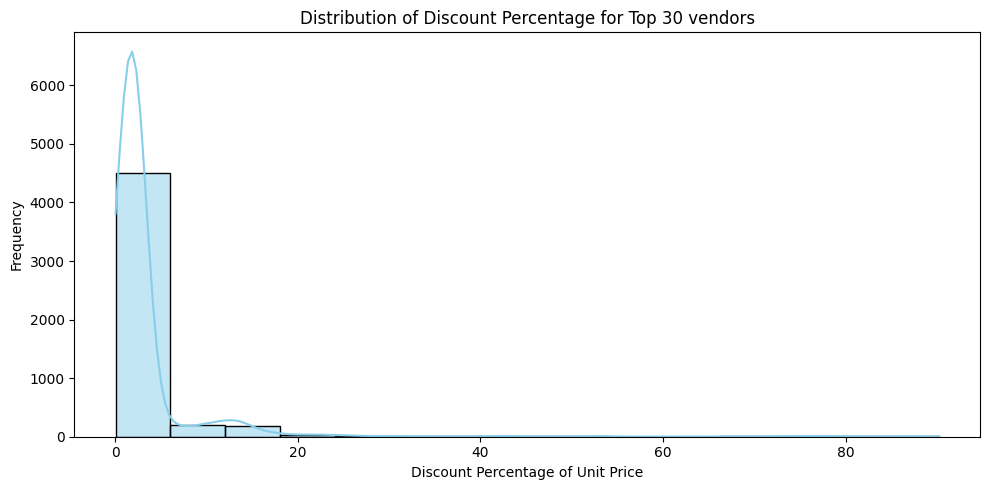

In [191]:
# find top 30 Vendor account by PO number
top_vendors = ppv_df['vendor_account'].value_counts().nlargest(30).index

# filer the df to only include those top 30 accounts
top_vendors_df = ppv_df[ppv_df['vendor_account'].isin(top_vendors)]

# calculate and print descriptive stats
mean_discount = top_vendors_df['Discount'].mean()
median_discount = top_vendors_df['Discount'].median()
std_discount = top_vendors_df['Discount'].std()
mode_discount = top_vendors_df['Discount'].mode()
print("Description Statistics for Discounts (Top 30 venodrs)")
print(f"Mean: {mean_discount:.2f}") # :.2f rounds floating point to 2 dig
print(f"Median: {median_discount:.2f}")
print("Modes:", ", ".join(f"{m:.2f}" for m in mode_discount))
print(f"Standard Devaition: {std_discount:.2f}")

# calculate discount percentage
top_vendors_df['Discount %'] = (top_vendors_df['Discount'] / top_vendors_df['Unit price']) * 100

#plot the distribution of discounts
plt.figure(figsize=(10,5))
sns.histplot(top_vendors_df['Discount %'],bins=15, kde=True, color="skyblue")
plt.title("Distribution of Discount Percentage for Top 30 vendors")
plt.xlabel("Discount Percentage of Unit Price")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

The main problem we are encountering is the lack of quantitative and qualitative data that correlates with the discounts, but intuition tells me that the discount usually will arise from difference in room rates, tax, service fees or some combination of each one. The logical approach would be to systematically look at the breakdown of those variables, in absence of a way to download that data, I will take some representative samples of the high frequency discount amounts ~5 bookings, will ensure diversity in booking dates and locations if available. (also, need to log transform when we look at distributions due to the right skewness)

In [192]:
# find recurring discount amounts per vendor 
recurring_discounts = ppv_df.groupby(['vendor_account', 'Discount']).size().reset_index(name='Count')
recurring_discounts = recurring_discounts[recurring_discounts['Count'] > 1]

In [193]:
samples = (
    ppv_df[ppv_df['vendor_account'].isin(recurring_discounts['vendor_account'])]
    .groupby('vendor_account', group_keys=False)
    .apply(lambda x: x.sample(n=min(len(x), 5), random_state=42))
    .reset_index(drop=True)
)

C:\Users\gavin.qu\AppData\Local\Temp\ipykernel_8056\137279025.py:4: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=min(len(x), 5), random_state=42))


In [194]:
# samples.to_csv('ppv_manual_review.csv', index=False)

In [195]:
# read new manual samples csv into memory 
granular_df = pd.read_csv('data/ppv_manual_review.csv')

print("Granular Data Columns:")
print(granular_df.columns.to_list())

Granular Data Columns:
['Vendor account', 'Purchase order', 'Booking number', 'Net amount', 'Discount', 'Unit price', 'Currency', 'Requested receipt date', 'Procurement category', 'Line status', 'Line number', 'Quantity', 'Group', 'Nightly rate issue', 'Tax issue', 'Service fee issue']


In [196]:
# sum the total of 1s in each column separately
nightly_rate_sum = granular_df['Nightly rate issue'].sum()
tax_issue_sum = granular_df['Tax issue'].sum()
service_fee_sum = granular_df['Service fee issue'].sum()

issue_columns = ['Nightly rate issue', 'Tax issue', 'Service fee issue']
total_issues = granular_df[['Nightly rate issue', 'Tax issue', 'Service fee issue']].sum().sum() # computes number of 1 in those columns
total_cells = granular_df[issue_columns].size
percentage_issues = total_issues / total_cells

print(f"Total nightly rate issues: {nightly_rate_sum}")
print(f"Total tax issue: {tax_issue_sum}")
print(f"Total service fee issue: {service_fee_sum}")
print(f"Percentage of Known issues: {percentage_issues:.2%}")
print(f"Percentage of Unknown issue: {1 - percentage_issues:.2%}")

Total nightly rate issues: 84
Total tax issue: 84
Total service fee issue: 0
Percentage of Known issues: 28.57%
Percentage of Unknown issue: 71.43%


#### Visualization of Discount Distribution

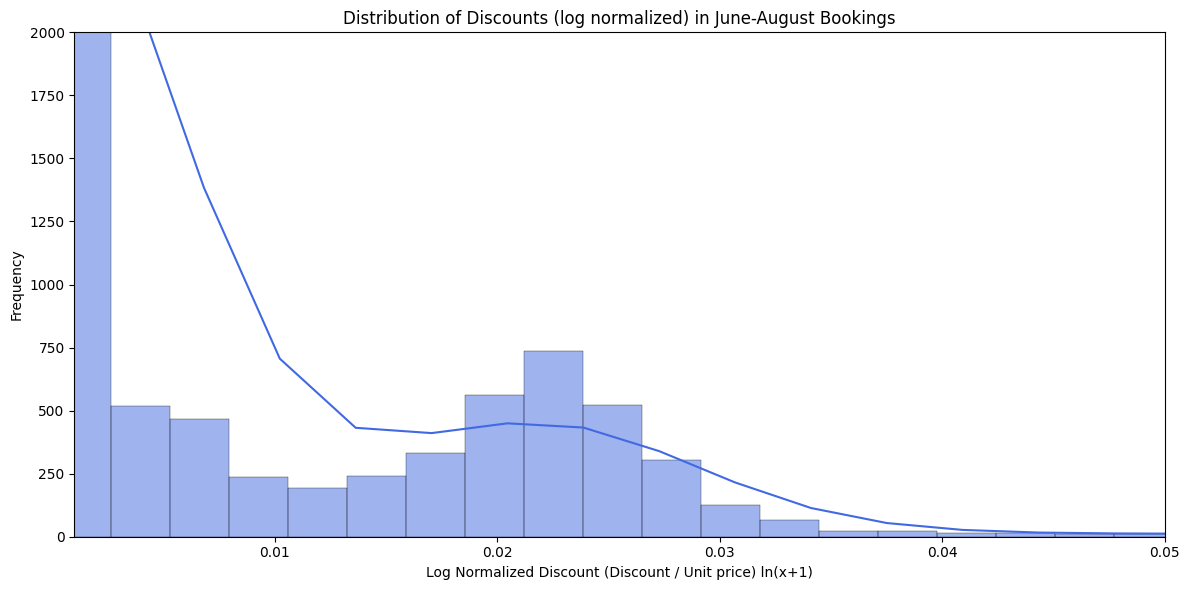

In [197]:
# filter total_df set Discount < 5 to 0
total_df['Discount'] = total_df['Discount'].apply(lambda x: 0 if x < 5 else x)

# normalize discount to remove extreme values
total_df['Normalized discount'] = total_df['Discount'] / total_df['Unit price']

# log transform so it does not skew right significantly
total_df['Log normalized discount'] = np.log1p(total_df['Normalized discount'])

# plot!
plt.figure(figsize=(12,6))
sns.histplot(total_df['Log normalized discount'].dropna(), bins=256, kde=True, color='royalblue')
plt.title('Distribution of Discounts (log normalized) in June-August Bookings')
plt.xlabel('Log Normalized Discount (Discount / Unit price) ln(x+1)')
plt.ylabel('Frequency')
plt.xlim(0.001, 0.05) # set x axis limits
plt.ylim(0, 2000) # set y axis limit
plt.tight_layout()
plt.show()

#### Intepretation of the above plot
I clipped the discount values < 5, so the "real discounts" start at $5. The next step normalized discount by dividin discount by Unit price, this is done to eliminate extreme values due to the absolute monetary amount on some bookings. Example: Discount = 20 on Unit price = 100 → 0.2 (20%).
Since discounts and prices in general are often right-skewed (lots of small values, a few extreme values). Log normalization = ln(1 + normalized discount) gives us the compression by "squeezing" big values closer to the center so the histogram is easier to intepret. Exponentiate it (exp(x) -1) to get the original discount fraction of unit price. 
Lastly, you can set the xlim and ylim to fit the graph. xlim of 0.011 ~ 0.11% of unit price, e.g. $1 PPV on a $1000 unit price. 

In [198]:
total_df['Discount'].describe() # spread in actual monetary value

count    17507.000000
mean        25.960840
std        146.915334
min          0.000000
25%          0.000000
50%          0.000000
75%         10.060000
max       8764.430000
Name: Discount, dtype: float64

In [199]:
total_df['Discount'].var()       # variance in terms of normalized values, comparing between cheap vs. expensive hotel bookings
#total_df['Discount'].skew()      # skewness
#total_df['Discount'].kurt()   

np.float64(21584.11526708215)

## Compass Report Nightly Rate EDA

In [200]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import random
import os

In [201]:
room_night_df = pd.read_csv('data/compass_report.csv')
print("Column Names:", room_night_df.columns.tolist())
print("Shape:", room_night_df.shape)
print(room_night_df.info())     # shows column dtypes and non-null counts
print(room_night_df.head())     # shows first few rows
print(room_night_df.describe().T)   # count, mean, std, .T transposes it so each column -> row

Column Names: ['program', 'Destination', 'Region', 'Package_Name', 'booking_number', 'Reservation_type', 'Membership_Type', 'Hotel_Name', 'Category', 'Sub_Category', 'Booked_Date', 'Check_In_Date', 'Check_Out_Date', 'textbox43', 'No_of_Rooms', 'No_of_Nights_Staying', 'No_of_Nights_In_Period', 'textbox45', 'Net_Price', 'Gross_Price', 'textbox25', 'Textbox56', 'Textbox59', 'Hotel_Name_1', 'No_of_Nights_In_Period_1', 'Net_Price_1', 'Gross_Price_1', 'textbox27']
Shape: (95741, 28)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95741 entries, 0 to 95740
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   program                   95741 non-null  object 
 1   Destination               95741 non-null  object 
 2   Region                    95741 non-null  object 
 3   Package_Name              95663 non-null  object 
 4   booking_number            95741 non-null  object 
 5   Reservation_type   

## Random Forest
- Step 1: Engineer features to prep for classification tree (one hot encoding, etc.)
- Step 2: Identify useful # of variables (p). 
- Step 3: select m # of variables for each tree. 
- Step 4: Build forest by repaeting above steps
- Step 5: test using cross validation or test data
- Step 6: Calculate vote for each predicted target. 

### 1. Data Wrangling

In [202]:
# ensure check in date is datetime format
room_night_df['Check_In_Date'] = pd.to_datetime(room_night_df['Check_In_Date'])
start_date = "6/1/2025"
end_date = "8/31/2025"

filtered_room_night_df = room_night_df[
    (room_night_df['Check_In_Date'] >= start_date) &
    (room_night_df['Check_In_Date'] <= end_date)
]

In [247]:
# now merge on booking number
merged_df = filtered_room_night_df.merge(
    ppv_df[['booking_number']], 
    on='booking_number', 
    how='left',
    indicator=True
)

# create the ppv column TRUE if fbooking number in ppv_df else FALSE
merged_df['PPV'] = merged_df['_merge'].eq('both')
merged_df.drop(columns=['_merge'], inplace=True) # drop helper column _merge


merged_df = merged_df.merge(
    total_df[['booking_number', 'vendor_account']], 
    on='booking_number', 
    how='left'
)
merged_df = merged_df.dropna(subset=['vendor_account']).reset_index(drop=True) # reset index and drop rows that do not have valid vendor_account

In [248]:
merged_df.shape # this tells us that there are 5000 ppvs and the rest are not ppv
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24480 entries, 0 to 24479
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   program                   24480 non-null  object        
 1   Destination               24480 non-null  object        
 2   Region                    24480 non-null  object        
 3   Package_Name              24441 non-null  object        
 4   booking_number            24480 non-null  object        
 5   Reservation_type          24480 non-null  object        
 6   Membership_Type           24480 non-null  object        
 7   Hotel_Name                24480 non-null  object        
 8   Category                  24480 non-null  object        
 9   Sub_Category              24480 non-null  object        
 10  Booked_Date               24480 non-null  object        
 11  Check_In_Date             24480 non-null  datetime64[ns]
 12  Check_Out_Date    

In [249]:
merged_df.to_csv("ppv_test.csv") # visually check the output csv to see if columns are merged correctly

### 2. Feature Engineering and One Hot Encoding

In [258]:
# %pip install -U scikit-learn

In [259]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

'''Select useful column for Random Forest training: 
- drop identifier
- separate features (X) and target (Y)
- return the numeric + catgorical columns separatley for encoding
- return X, y, and encoders for reuse'''

def prepare_features(df):
    data = df.drop(columns=['booking_number'], errors='ignore') # drop the booking number identifiers so the model won't cheat

    # error handling
    if 'PPV' not in data.columns: 
        raise ValueError("Target column 'PPV' not found inthe dataframe")
    y = data['PPV']
    X = data.drop(columns=['PPV']) # every column that is not PPV

    # something to handle vendor_account (one hot encode)
    ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    vendor_encoded = ohe.fit_transform(X[['vendor_account']])
    vendor_encoded_df = pd.DataFrame(
        vendor_encoded,
        columns=ohe.get_feature_names_out(['vendor_account']), 
        index=X.index
    )

    # handle Package_Name (frequency encoding)
    freq_map = X['Package_Name'].value_counts().to_dict()
    X['package_name_freq'] = X['Package_Name'].map(freq_map)

    # create travel date 
    X['travel_date'] = pd.to_datetime(X['Check_In_Date']).dt.month

    # one hot encode travel date
    travel_date_dummies = pd.get_dummies(X['travel_date'], prefix='month')
    X = X.drop(columns=['Check_In_Date', 'travel_date']) # drop originial check in date and rtavel date 

    # drop original categorical columsn 
    X = X.drop(columns=['vendor_account', 'Package_Name'])
    
    # add back selected numeric + encodings
    numeric_features = ['Net_Price', 'Gross_Price', 'package_name_freq', 'No_of_Nights_Staying', 'No_of_Rooms']
    vendor_features = vendor_encoded_df.columns.tolist()

    # final dataset
    X_final = pd.concat([X[numeric_features], vendor_encoded_df, travel_date_dummies], axis=1)
    
    return X_final, y, ohe, freq_map

In [294]:
# prepre_features functon usage: 
X, y, ohe, freq_map = prepare_features(merged_df)

print("Final Feature Matrix Shape:", X.shape)
print("targe balance:\n", y.value_counts(normalize=True).round(3))
print("Sample columns:", X.columns[:100])

Final Feature Matrix Shape: (24480, 66)
targe balance:
 PPV
False    0.592
True     0.408
Name: proportion, dtype: float64
Sample columns: Index(['Net_Price', 'Gross_Price', 'package_name_freq', 'No_of_Nights_Staying',
       'No_of_Rooms', 'vendor_account_HAALOHILANI',
       'vendor_account_HAAULANIDISNEY', 'vendor_account_HACASTLEKAMAOLESANDS',
       'vendor_account_HACASTLEKANALOAKONA', 'vendor_account_HACASTLEKIA',
       'vendor_account_HACASTLERESORT', 'vendor_account_HAEMBASSYSUITES',
       'vendor_account_HAFOURSEASHUALA', 'vendor_account_HAFOURSEASOAHU',
       'vendor_account_HAFOURSEASWAILE', 'vendor_account_HAGRANDWAILEA',
       'vendor_account_HAHALIIKAIWAIKO', 'vendor_account_HAHANALEIBAY',
       'vendor_account_HAHAPUNABEACH', 'vendor_account_HAHILOHAWAIIAN',
       'vendor_account_HAHONUAKAI', 'vendor_account_HAISLANDMAUNALANI',
       'vendor_account_HAKAHALAMANDARI', 'vendor_account_HAKAILUAPACIFIC',
       'vendor_account_HAKALAIWAIKBEACH', 'vendor_account_HAKAP

### 3. Split data into training and test set

In [261]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,y,
    test_size=0.2, # 20/80 train test split
    stratify=y,
    random_state=35 # 35 people on our team
)

### 4. Fit Random Forest

In [303]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,    # number of trees in the forest
    random_state=35,
    max_features="sqrt",  # m = sqrt(p)
    n_jobs=1,   #use all CPU cores
    class_weight="balanced"     #uses value of y to adjuste weight inversely proportional to class frequencies
)

rf.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### 5. Evaluate Model Performance
Check how well the model will predict PPVs (TRUE/FALSE) in our test data set

In [304]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = rf.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[2707  190]
 [ 258 1741]]

Classification report:
               precision    recall  f1-score   support

       False       0.91      0.93      0.92      2897
        True       0.90      0.87      0.89      1999

    accuracy                           0.91      4896
   macro avg       0.91      0.90      0.90      4896
weighted avg       0.91      0.91      0.91      4896



A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-

True Positives (TP) – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

True Negatives (TN) – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

False Positives (FP) – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called Type I error.

False Negatives (FN) – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called Type II error.

### 6. Get Feature Importance

In [305]:
import pandas as pd

# find feature importance
importances = rf.feature_importances_

# match to column names
feat_importances = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)

print(feat_importances.head(15)) #this will give us the top 15 features

package_name_freq                      0.163914
Gross_Price                            0.150049
Net_Price                              0.149596
No_of_Nights_Staying                   0.061888
vendor_account_HAOHANAWAIKIKIB         0.041407
vendor_account_HAOUTRIGGERKONA         0.037221
vendor_account_HAWAIKIKIBEACH          0.034642
vendor_account_HAKINGKAMEHA            0.030470
vendor_account_HAOUTRIGGERREEF         0.027147
vendor_account_HAROYALHIGHGATE         0.025762
vendor_account_HAQUEENKAPI             0.024763
vendor_account_HAOUTRIGGERKAANAPALI    0.024552
vendor_account_HAEMBASSYSUITES         0.017931
vendor_account_HAWESTINMAUI            0.015027
vendor_account_HAKAILUAPACIFIC         0.011714
dtype: float64


Beyond gross price (post-markup) and net price (pre-markup), we see that the package name frequency is ranked highly in our PPV predictions. 

### 7. Visualize the Feature Importances

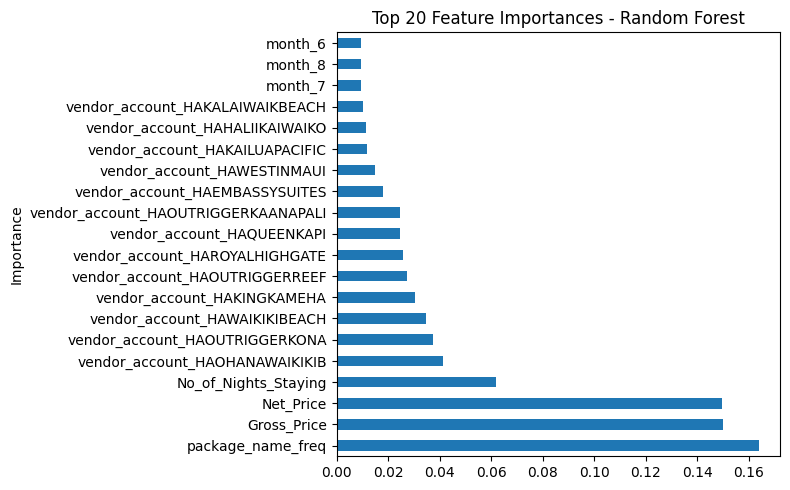

In [306]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
feat_importances.head(20).plot(kind='barh')
plt.title("Top 20 Feature Importances - Random Forest")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

- If vendor_account_* dummies dominate, this means vendor-specific behavior is a strong driver.
- If package_name_freq shows up high, it means certain packages are systematically underbilled.
- If cost breakdowns (Net_Price, Gross_Price, etc.) matter -> underbilling is tied to pricing structure.
- If month_* dummies rank high -> seasonality plays a role.

**The tree showing below is just a sample tree out of the 200 trees we trained in the model:**

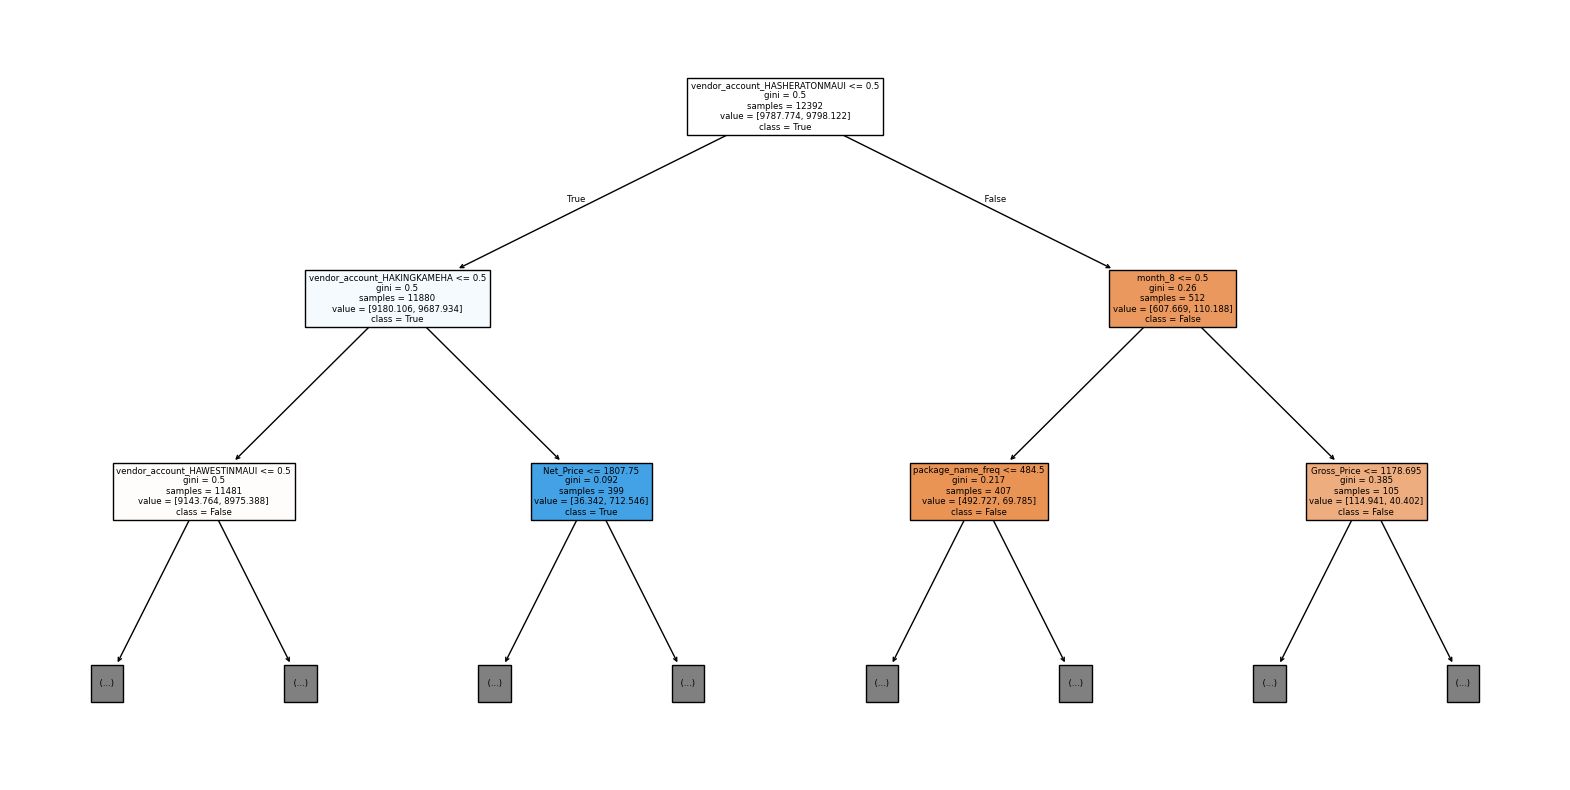

In [308]:
# Tree Visualisation
import matplotlib.pyplot as plt
from sklearn import tree

# Pick first tree from forest
plt.figure(figsize=(20,10))
tree.plot_tree(
    rf.estimators_[0],
    feature_names=X_train.columns,
    class_names=['False', 'True'],
    filled=True,
    max_depth=2
)
plt.show()

### 8. Robustness Test: Cross-Validation with Random Forest

In [281]:
from sklearn.model_selection import cross_val_score
import numpy as np

# satrt with 5 fold cross validation on training data
cv_scores = cross_val_score(
    rf, X_train, y_train, 
    cv=5, 
    scoring='f1'    # F1 score balances precision/recall (especially for ppv TRUEs)
)

print("CV F1-score:", cv_scores)
print("Mean F1-score:", np.mean(cv_scores))

CV F1-score: [0.89228848 0.88344329 0.88719899 0.88266751 0.88874842]
Mean F1-score: 0.886869336665366


High F1-Score (0,1) is a good sign because precision and recall's inverse is in the denominator when we calcualte the harmonic mean. Why we use F1 score, it's often a better indicator when the data y is unbalance, we have mostly FALSE PPVs and only ~ 20% TRUE PPVs. As a general rule of thumb, a F-1 score > 0.7 is considered good. 

### 9. Hyperparameter Tuning
n_estimators → number of trees. More trees = more stable, but slower. Common: 100–500.

max_depth → how deep each tree can grow. Prevents overfitting. However, empirical evidence (Segal 2004) says full-grown trees seldom cost much. 

max_features → number of features considered at each split. Controls randomness.

min_samples_split → min samples needed to split a node.

min_samples_leaf → min samples required at a leaf.

In [286]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# first we define the parameter grid
param_grid = {
    'n_estimators': [200, 300, 400, 500], 
    # 'max_depth': [None, 10, 20, 30, 40, 50], 
    'max_features': ['sqrt', 'log2'], 
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(class_weight="balanced", random_state=35, n_jobs=-1)

# randomized search with 5 fold Cross Validation 
grid_search = GridSearchCV(
    estimator=rf, 
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,  #use all processors
    verbose=2
)

# fit the model
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best CV F-1 score:", grid_search.best_score_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}
Best CV F-1 score: 0.8874553605171579


### 10. Results and Conclusion

1. In this project, I build a Random Forest Classifier to predict whether a booking will become a PPV once invoiced. 
2. The model accuracy score with 100 decision trees is actually quite good yielding 0.91 F1-score, and a 5-fold cross validation yielded us 0.88 mean F1-score. 
3. The hyperparameter tuning actually re-affirmed the empirically tested theory that using sqrt(p) as our 'm' at each split is sufficient for good results on average. Although more time consuming, employing a Grid Search CV algorithm to optimize the hyperparameters will give us the best combination of tested parameters. 
4. **Next Steps:** The next phase involves removing low-importance features (e.g., booking month, travel date) and refitting the model to assess potential performance gains.
5. In terms of explanability, this is one of the primary reasons I chose Random Forest. In a business setting when presenting to multiple stakeholders whose backgrounds can vary, more exaplanable models will often outperform less transparent alternatives, ceteris paribus. 
6. The core question is whether identifiable patterns exist in the data that can be leveraged. Preliminary analysis of the June–August dataset from D365 suggests meaningful patterns, particularly around package names and total price.
7. Note: The model itself was not given any data that could be correlated to the existence of PPVs, they're only given categorical data which I encoded into dynamic data types, and the purchase price + mark-up price of each booking. While the predictive scope of this model is probably limited for strictly accounting and finance purposes, the model demonstrates strong classification capability and highlights the most influential variables driving PPVs.